In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from PIL import Image
def im_with_bbox(img_rgb, bbox_height_start, bbox_height_end,
                     bbox_width_start, bbox_width_end, ax=None, color=(0, 255, 255)):
    img_bgr_uint8 = cv2.cvtColor(np.uint8(255*img_rgb), cv2.COLOR_RGB2BGR)
    cv2.rectangle(img_bgr_uint8, (bbox_width_start, bbox_height_start), (bbox_width_end-1, bbox_height_end-1),
                  color, thickness=2)
    img_rgb_uint8 = img_bgr_uint8[...,::-1]
    img_rgb_float = np.float32(img_rgb_uint8) / 255
    #plt.imshow(img_rgb_float)
    #plt.axis('off')
    if ax is not None:
        ax.imshow(img_rgb_float)
        ax.axis('off')
    plt.imshow(img_rgb_float)

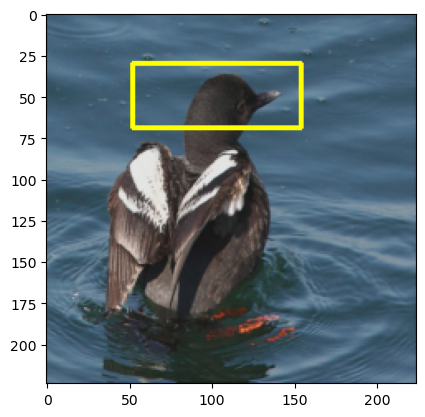

In [2]:
bbx = np.load("local_analysis/handful_of_images/058.Pigeon_Guillemot/Resnet34/002/15push0.7530.pth/most_activated_prototypes/top-1_activated_prototype_bbox.npy")
guillemot = plt.imread('local_analysis/handful_of_images/058.Pigeon_Guillemot/Resnet34/002/15push0.7530.pth/original_img.png')

im_with_bbox(img_rgb=guillemot,
            bbox_height_start=bbx[0],
            bbox_height_end=bbx[1],
            bbox_width_start=bbx[2],
            bbox_width_end=bbx[3], color=(0, 255, 255))

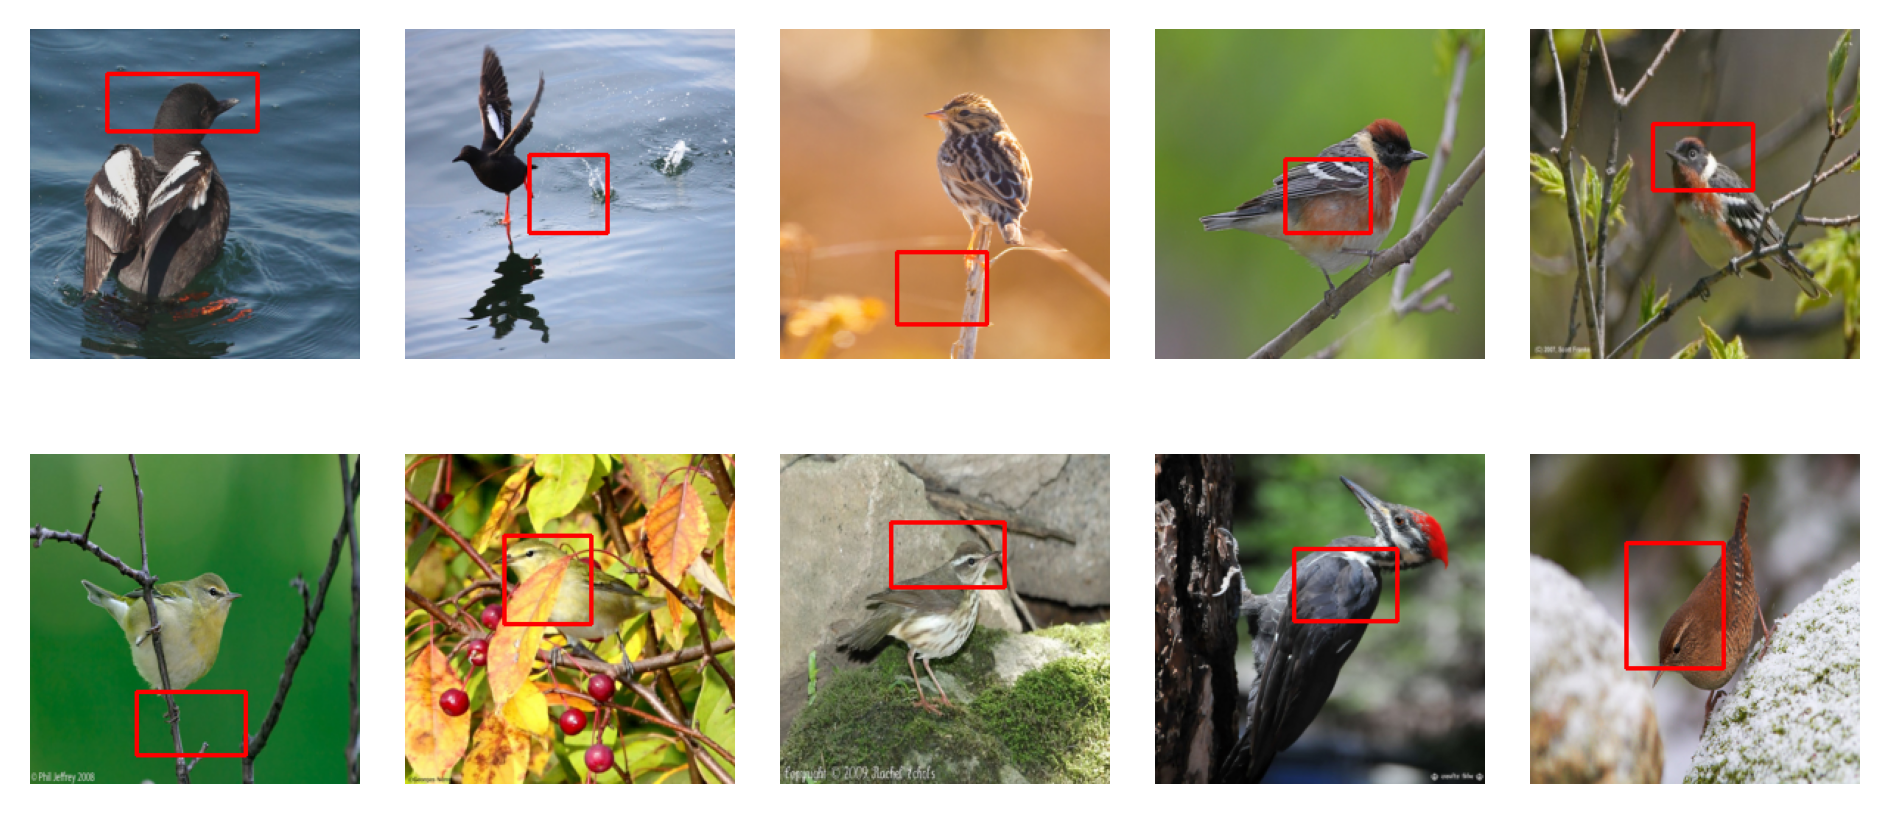

In [3]:
img_paths = glob.glob('local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/original_img.png')
bboxes = glob.glob("local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/most_activated_prototypes/top-1*.npy")
fig, ax = plt.subplots(2,5, dpi=300, tight_layout=True)
ax = ax.ravel()
for i, (img_path, bbx_path) in enumerate(zip(img_paths, bboxes)):
    img = plt.imread(img_path)
    bbx = np.load(bbx_path)
    im_with_bbox(img_rgb=img,
                 bbox_height_start=bbx[0],
                 bbox_height_end=bbx[1],
                 bbox_width_start=bbx[2],
                 bbox_width_end=bbx[3], ax=ax[i], color=(0, 0, 255))
plt.savefig('figures/ProtoP_bboxes.png', bbox_inches='tight')

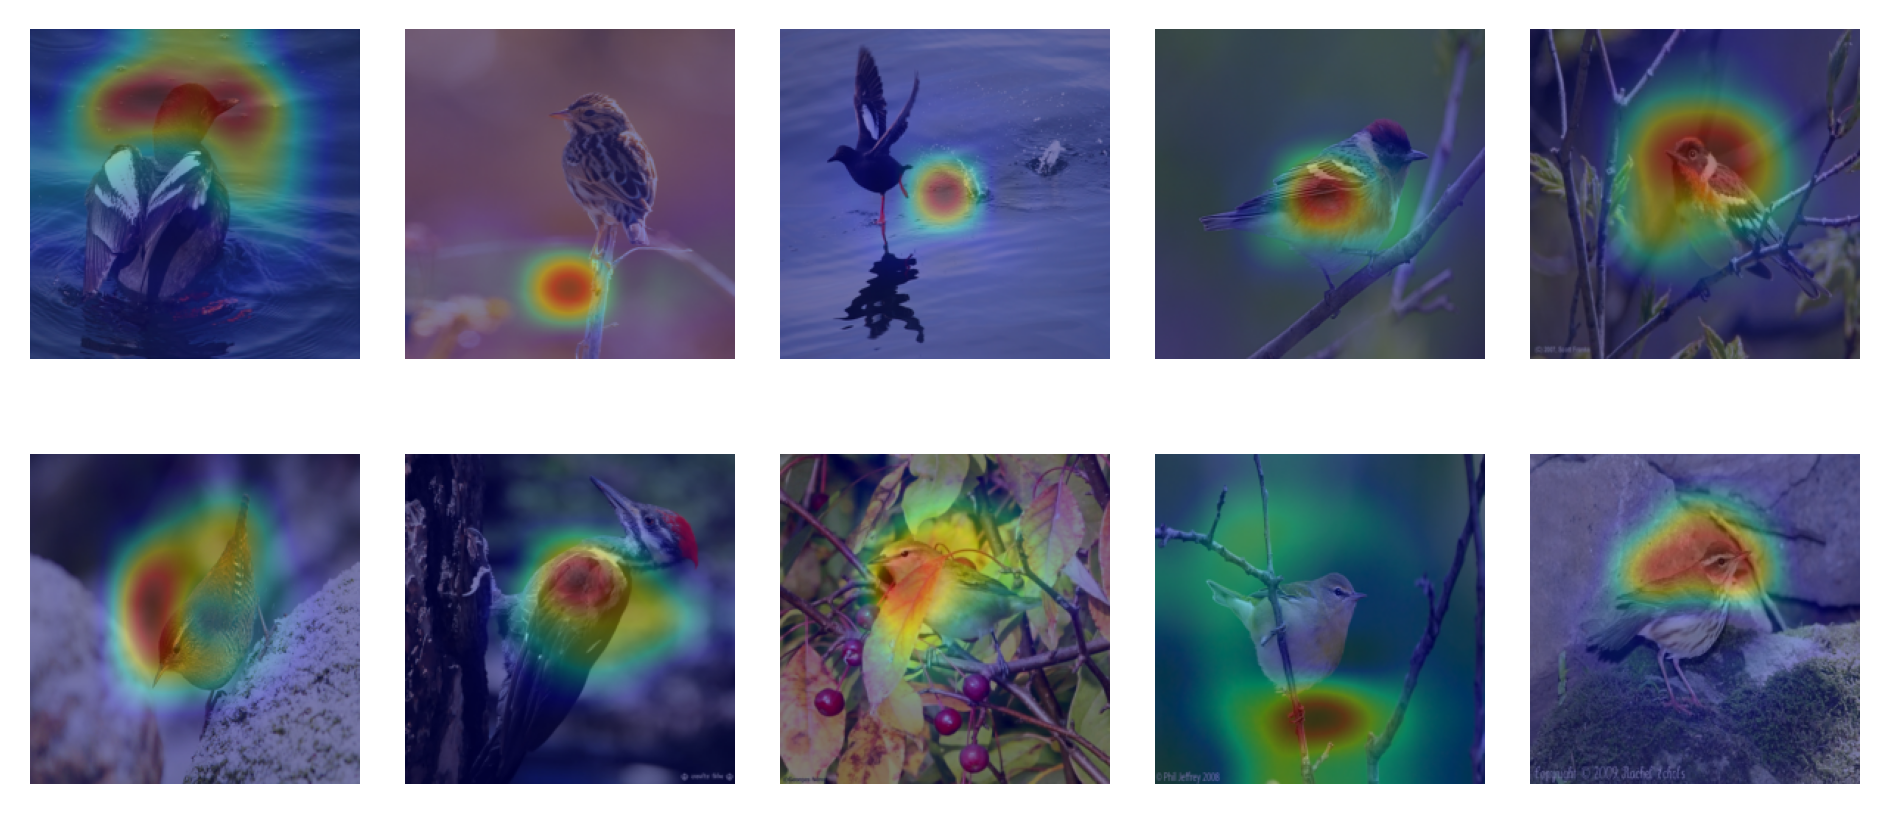

In [4]:
heatmaps = glob.glob('local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/most_activated_prototypes/prototype_activation_map_by_top-1_prototype.png')
fig, ax = plt.subplots(2,5, dpi=300, tight_layout=True)
ax = ax.ravel()

ax[0].imshow(plt.imread(heatmaps[0]))
ax[1].imshow(plt.imread(heatmaps[2]))
ax[2].imshow(plt.imread(heatmaps[1]))
ax[3].imshow(plt.imread(heatmaps[3]))
ax[4].imshow(plt.imread(heatmaps[4]))
ax[5].imshow(plt.imread(heatmaps[9]))
ax[6].imshow(plt.imread(heatmaps[8]))
ax[7].imshow(plt.imread(heatmaps[6]))
ax[8].imshow(plt.imread(heatmaps[5]))
ax[9].imshow(plt.imread(heatmaps[7]))

for i, heatmap in enumerate(heatmaps):
    ax[i].set_axis_off()
plt.savefig('figures/ProtoP_heatmaps.png', bbox_inches='tight')

In [16]:
# Using the bbox dataframe
# get the valid images
img_id_to_path = pd.read_csv('datasets/CUB_200_2011/images.txt', sep=' ', header=None, names=['img_id', 'path'])
img_id_to_path = dict(img_id_to_path.values)
img_id_to_bbx = pd.read_csv('datasets/CUB_200_2011/bounding_boxes.txt', sep=' ', header=None, names=['img_id', 'x', 'y', 'w', 'h'])
train_test_split = pd.read_csv('datasets/CUB_200_2011/train_test_split.txt', sep=' ', header=None, names=['img_id', 'is_train'])
train_test_split = dict(train_test_split.values)

img_id_to_path = {idx: path for idx, path in img_id_to_path.items() if train_test_split[idx] == 0}

bboxes = pd.read_csv('bboxes.csv', index_col=0)
bboxes

xmin  ymin  xmax  ymax
id                           
1        54   130   125   187
3       110    64   169   125
6         0     0   224    39
10       30    42   122   107
12       66    47   129    99
...     ...   ...   ...   ...
11780    57    33   139   122
11783   121    45   167   114
11785    72    59   135   120
11786    90    89   148   146
11788    75     0   159    98

[5794 rows x 4 columns]

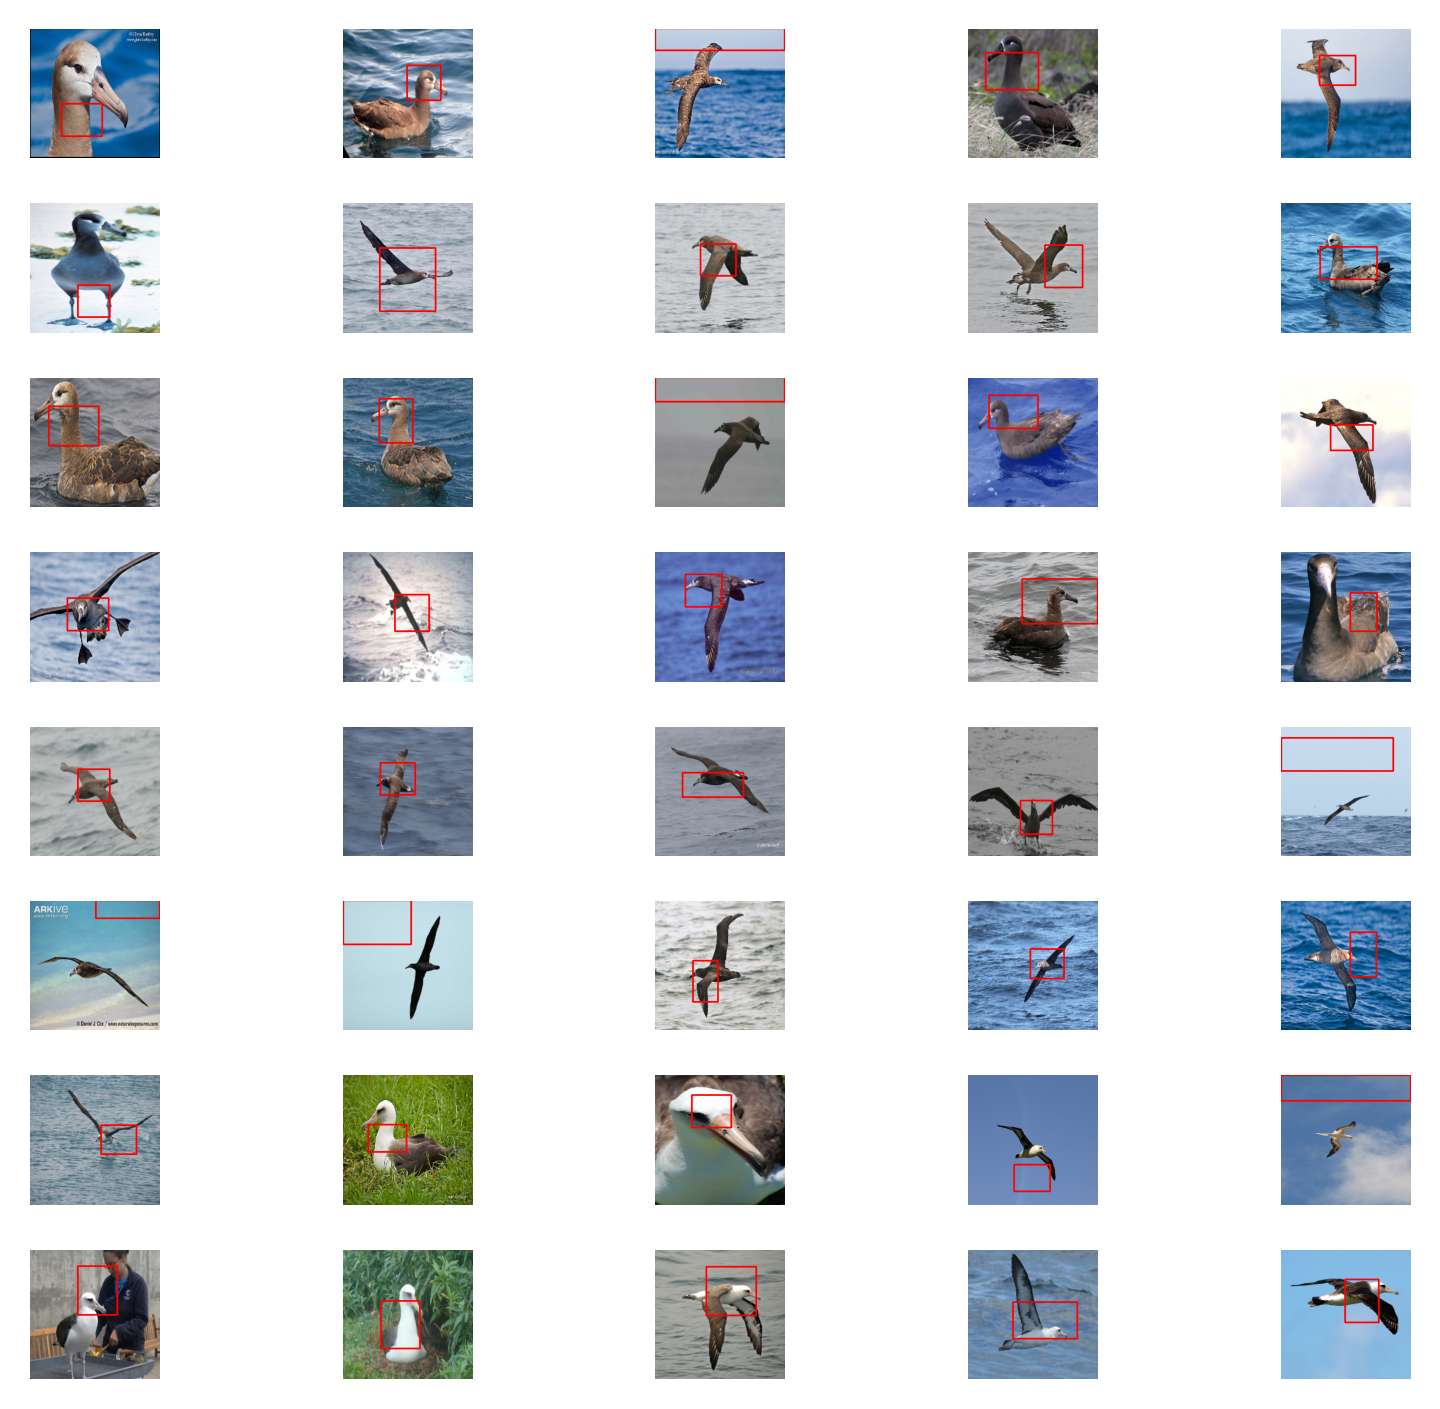

In [21]:
i = 0
fig, ax = plt.subplots(8,5, dpi=300, tight_layout=True)
ax = ax.ravel()
for img_id, path in img_id_to_path.items():
    xmin, ymin, xmax, ymax = bboxes[bboxes.index == img_id].values.flatten()

    img = cv2.imread('datasets/CUB_200_2011/images/' + path)[:,:,::-1]
    # pretty sure that the images need to be resized to 224x224 for the bounding boxes to make sense
    # but I am not sure. See line 109 of get_all_bboxes.py. there the activation pattern is resized to 224x224
    img = np.array(cv2.resize(img, (224,224))).astype(float) / 255


    im_with_bbox(img_rgb=img,
                bbox_height_start=ymin,
                bbox_height_end=ymax,
                bbox_width_start=xmin,
                bbox_width_end=xmax,ax=ax[i], color=(0, 0, 255))
    i += 1
    if i == 8*5:
        break
